In this notebook, we will train a new sentiment classifier model from scratch with using nanoGPT as baseline.

If you didn't install the required packages before, you can with the commented out line below. Otherwise, you will get errors at the first import.

In [1]:
#!pip install torch numpy transformers datasets tiktoken wandb tqdm matplotlib seaborn scipy scikit-learn emoji

In [2]:
import wandb
import pickle
import tiktoken
import torch
from torch.utils.data import DataLoader
from models.train_from_scratch import train
from data.utils.prepare_from_scratch import prepare_data
from data.utils.dataset import CustomerSentimentDataset
from models.evaluate_from_scratch import plot_confusion_matrix, evaluate

[nltk_data] Downloading package stopwords to /home/eren/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/eren/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df_input = prepare_data()
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   issue_area                   1000 non-null   object
 1   issue_category               1000 non-null   object
 2   issue_sub_category           1000 non-null   object
 3   issue_category_sub_category  1000 non-null   object
 4   customer_sentiment           1000 non-null   object
 5   product_category             1000 non-null   object
 6   product_sub_category         1000 non-null   object
 7   issue_complexity             1000 non-null   object
 8   agent_experience_level       1000 non-null   object
 9   agent_experience_level_desc  1000 non-null   object
 10  conversation                 1000 non-null   object
 11  data_split_type              1000 non-null   object
 12  sentiment                    1000 non-null   int64 
 13  text_cleaned                 1000 

In [4]:
sweep_config = {
    'method': 'grid',
    'parameters': {
        'epochs': {
            'value': 30
        },
        'batch_size': {
            'values': [32]
        },
        'vocab_size': {
            'values': [50304]
        },
        'block_size': {
            'values': [1024]
        },
        'n_layer': {
            'values': [6]
        },
        'n_head': {
            'values': [6]
        },
        'n_embd': {
            'values': [384]
        },
        'dropout': {
            'values': [0.3]
        },
        'learning_rate': {
            'values': [0.0001]
        },
        'weight_decay': {
            'values': [0.01]
        },
        'max_grad_norm': {
            'values': [1.0]
        },
        'beta1': {
            'values': [0.9]
        },
        'beta2': {
            'values': [0.999]
        },
        'init_from': {
            'value': 'scratch'
        },
    }
}

In [5]:
sweep_id = wandb.sweep(sweep_config, project="DI725_assignment_1_2389088_from_scratch")
wandb.agent(sweep_id=sweep_id, function=train)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Create sweep with ID: q2yweqeo
Sweep URL: https://wandb.ai/erennarin-92-metu-middle-east-technical-university/DI725_assignment_1_2389088_from_scratch/sweeps/q2yweqeo


wandb: Agent Starting Run: naaxd5fg with config:
wandb: 	batch_size: 32
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	block_size: 1024
wandb: 	dropout: 0.3
wandb: 	epochs: 30
wandb: 	init_from: scratch
wandb: 	learning_rate: 0.0001
wandb: 	max_grad_norm: 1
wandb: 	n_embd: 384
wandb: 	n_head: 6
wandb: 	n_layer: 6
wandb: 	vocab_size: 50304
wandb: 	weight_decay: 0.01
wandb: Currently logged in as: erennarin-92 (erennarin-92-metu-middle-east-technical-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


number of parameters: 29.96M
num decayed parameter tensors: 27, with 30,327,936 parameters
num non-decayed parameter tensors: 50, with 30,720 parameters
using fused AdamW: True

Epoch 1, Train Loss: 0.80, Train F1 Macro: 0.36, Train Precision Macro: 0.37, Train Recall Macro: 0.47, Train Accuracy: 0.56
Epoch 1, Val Loss: 0.78, Val F1 Macro: 0.39, Val Precision Macro: 0.43, Val Recall Macro: 0.40, Val Accuracy: 0.63

Epoch 2, Train Loss: 0.70, Train F1 Macro: 0.50, Train Precision Macro: 0.63, Train Recall Macro: 0.54, Train Accuracy: 0.64
Epoch 2, Val Loss: 0.82, Val F1 Macro: 0.32, Val Precision Macro: 0.43, Val Recall Macro: 0.37, Val Accuracy: 0.59

Epoch 3, Train Loss: 0.64, Train F1 Macro: 0.58, Train Precision Macro: 0.64, Train Recall Macro: 0.60, Train Accuracy: 0.71
Epoch 3, Val Loss: 0.63, Val F1 Macro: 0.51, Val Precision Macro: 0.50, Val Recall Macro: 0.52, Val Accuracy: 0.75

Epoch 4, Train Loss: 0.56, Train F1 Macro: 0.66, Train Precision Macro: 0.69, Train Recall Macro: 0

epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
train_accuracy,▁▂▃▄▄▅▆▆▆▇▇▇▇▇▇▇▇▇▇██▇████████
train_f1_macro,▁▃▃▄▄▅▅▅▆▆▆▆▆▆▆▆▆▆▇▇▇▆▇▇▆▇█▇██
train_loss,█▇▇▆▆▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
train_precision_macro,▁▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆▆▇▇▆▆▇▆▇█▇██
train_recall_macro,▁▂▃▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▆▇▆▆▇▆▇█▇██
val_accuracy,▂▁▅▃▃▆▃▇▆▇▇▇▇▇█▇▇▇█▇▆██▇█▇▇███
val_f1_macro,▂▁▄▃▃▅▄▅▅▆▆▆▆▅▆▆▅▅▆▅▅▆▆▆▆▆▆▆▆█
val_loss,▄▅▂▆█▃█▁▄▁▃▂▅▆▃▄▅▄▂▄▆▃▄▆▅▅▅▇▅▄
val_precision_macro,▁▁▂▂▂▃▂▃▂▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃█
val_recall_macro,▂▁▅▄▄▆▄▆▅▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆█


Run naaxd5fg errored:
Traceback (most recent call last):
  File "/home/eren/anaconda3/envs/DI725_assignment1/lib/python3.10/site-packages/wandb/agents/pyagent.py", line 306, in _run_job
    self._function()
  File "/home/eren/Drive/METU/Courses/[DI 725] Transformers and Attention-Based Deep Networks/Assignments/Assignment 1/DI725_assignment1/models/train_from_scratch.py", line 116, in train
    model.load_state_dict(torch.load(best_model_path)['model'])
  File "/home/eren/anaconda3/envs/DI725_assignment1/lib/python3.10/site-packages/torch/serialization.py", line 1425, in load
    with _open_file_like(f, "rb") as opened_file:
  File "/home/eren/anaconda3/envs/DI725_assignment1/lib/python3.10/site-packages/torch/serialization.py", line 751, in _open_file_like
    return _open_file(name_or_buffer, mode)
  File "/home/eren/anaconda3/envs/DI725_assignment1/lib/python3.10/site-packages/torch/serialization.py", line 732, in __init__
    super().__init__(open(name, mode))
FileNotFoundError: [E

In [6]:
model_path = '../models/3_nanoGPT_sentiment_model.pkl'
loaded_model = pickle.load(open(model_path, 'rb'))

In [7]:
tokenizer = tiktoken.get_encoding("gpt2")
test_dataset = CustomerSentimentDataset(df_input[df_input.data_split_type == 'test'], max_length=1024,
                                        tokenizer=tokenizer)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Test Loss: 2.78, Test F1 Macro: 0.57, Test Precision Macro: 0.78, Test Recall Macro: 0.60, Test Accuracy: 0.60


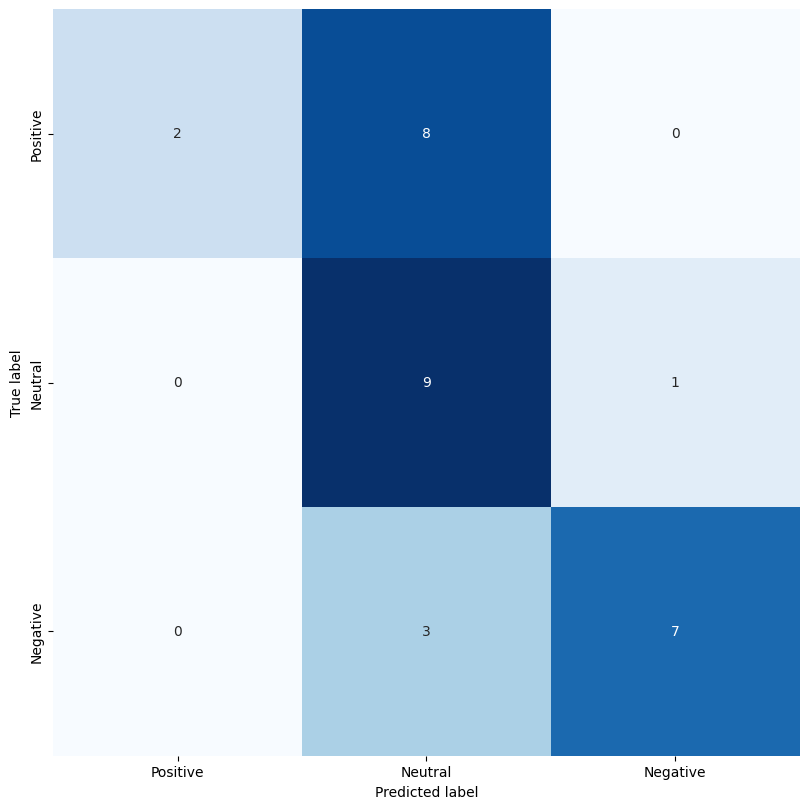

Error: You must call wandb.init() before wandb.log()

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
test_loss, test_f1, test_prec, test_rec, test_acc, test_conf_matrix = evaluate(loaded_model, test_loader, device)
print(
    f"Test Loss: {test_loss:.2f}, Test F1 Macro: {test_f1:.2f}, Test Precision Macro: {test_prec:.2f}, Test Recall Macro: {test_rec:.2f}, Test Accuracy: {test_acc:.2f}")

plot_confusion_matrix(test_conf_matrix, class_names=['Positive', 'Neutral', 'Negative'])